In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stocks = ['AAPL', 'GOOGL', 'IBM', 'MSFT']
data = yf.download(stocks, start='2020-01-01', end='2023-01-01')
data

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                  AAPL      GOOGL         IBM        MSFT        AAPL   
Date                                                                    
2020-01-02   73.249031  68.433998  107.512405  155.093658   75.087502   
2020-01-03   72.536903  68.075996  106.654976  153.162476   74.357498   
2020-01-06   73.114891  69.890503  106.464455  153.558380   74.949997   
2020-01-07   72.771034  69.755501  106.535873  152.158249   74.597504   
2020-01-08   73.941635  70.251999  107.425079  154.581909   75.797501   
...                ...        ...         ...         ...         ...   
2022-12-23  131.299820  89.230003  136.478256  237.112091  131.860001   
2022-12-27  129.477600  87.389999  137.220139  235.354095  130.029999   
2022-12-28  125.504539  86.019997  134.907776  232.940552  126.040001   
2022-12-29  129.059387  88.449997  135.909790  239.376648  129.610001   
2022-12-30  129.378006  88.230003  135.746002  238.194717  129.929993   

                                                     High             ...  \
                GOOGL         IBM        MSFT        AAPL      GOOGL  ...   
Date                                                                  ...   
2020-01-02  68.433998  129.464630  160.619995   75.150002  68.433998  ...   
2020-01-03  68.075996  128.432129  158.619995   75.144997  68.687500  ...   
2020-01-06  69.890503  128.202682  159.029999   74.989998  69.916000  ...   
2020-01-07  69.755501  128.288712  157.580002   75.224998  70.175003  ...   
2020-01-08  70.251999  129.359467  160.089996   76.110001  70.592499  ...   
...               ...         ...         ...         ...        ...  ...   
2022-12-23  89.230003  141.649994  238.729996  132.419998  89.550003  ...   
2022-12-27  87.389999  142.419998  236.960007  131.410004  88.940002  ...   
2022-12-28  86.019997  140.020004  234.529999  131.029999  88.040001  ...   
2022-12-29  88.449997  141.059998  241.009995  130.479996  88.849998  ...   
2022-12-30  88.230003  140.889999  239.820007  129.949997  88.300003  ...   

                   Low                    Open                         \
                   IBM        MSFT        AAPL      GOOGL         IBM   
Date                                                                    
2020-01-02  128.843216  158.330002   74.059998  67.420502  129.063095   
2020-01-03  127.686424  158.059998   74.287498  67.400002  127.695984   
2020-01-06  127.342255  156.509995   73.447502  67.581497  127.552582   
2020-01-07  127.533463  157.320007   74.959999  70.023003  127.810707   
2020-01-08  128.030594  157.949997   74.290001  69.740997  128.594650   
...                ...         ...         ...        ...         ...   
2022-12-23  139.600006  233.940002  130.919998  87.110001  140.589996   
2022-12-27  141.229996  235.830002  131.380005  88.800003  141.729996   
2022-12-28  139.949997  234.169998  129.669998  86.980003  142.399994   
2022-12-29  140.449997  235.649994  127.989998  86.620003  140.580002   
2022-12-30  139.449997  236.660004  128.410004  86.980003  140.539993   

                           Volume                               
                  MSFT       AAPL     GOOGL      IBM      MSFT  
Date                                                            
2020-01-02  158.779999  135480400  27278000  3293436  22622100  
2020-01-03  158.320007  146322800  23408000  2482890  21116200  
2020-01-06  157.080002  118387200  46768000  2537073  20813700  
2020-01-07  159.320007  108872000  34330000  3232977  21634100  
2020-01-08  158.929993  132079200  35314000  4545916  27746500  
...                ...        ...       ...      ...       ...  
2022-12-23  236.110001   63814900  23003000  2092500  21207000  
2022-12-27  238.699997   69007800  20097300  2742400  16688600  
2022-12-28  236.889999   85438400  19523200  2539500  17457100  
2022-12-29  235.649994   75703700  23333500  2337200  19770700  
2022-12-30  238.210007   77034200  23986300

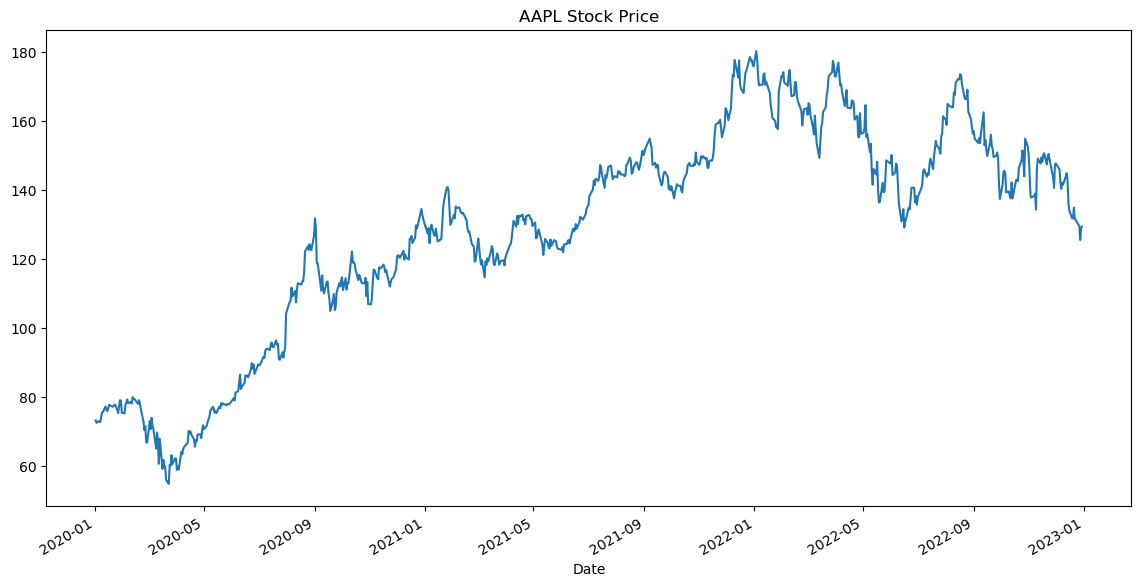

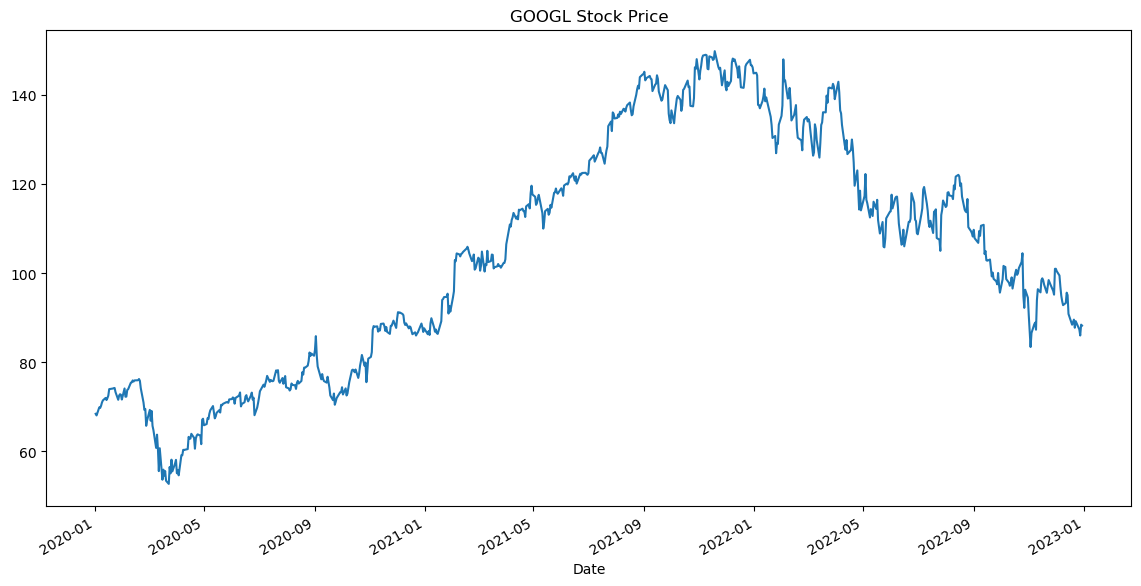

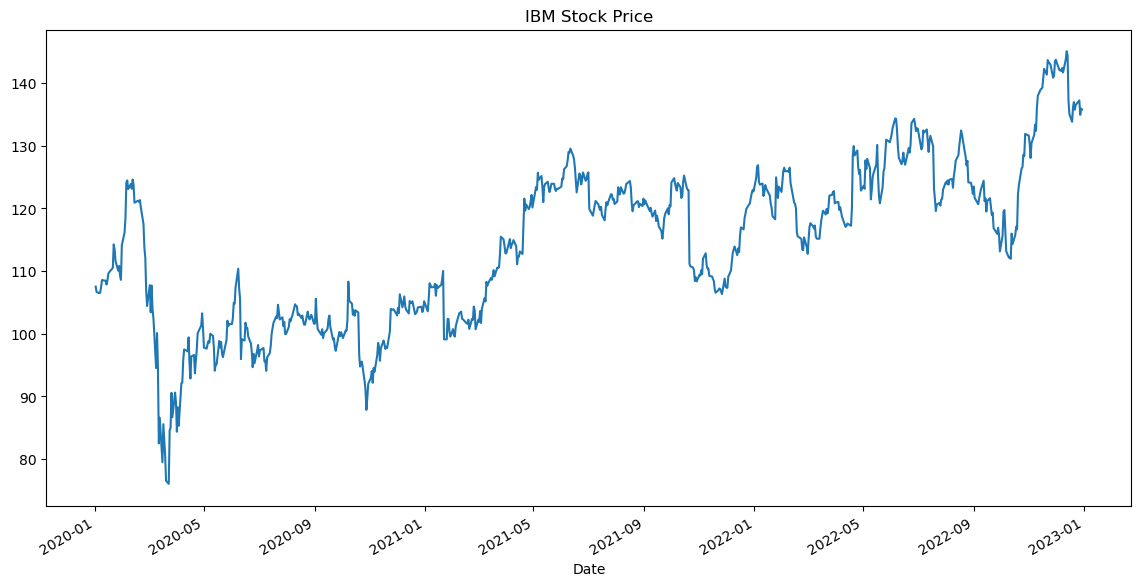

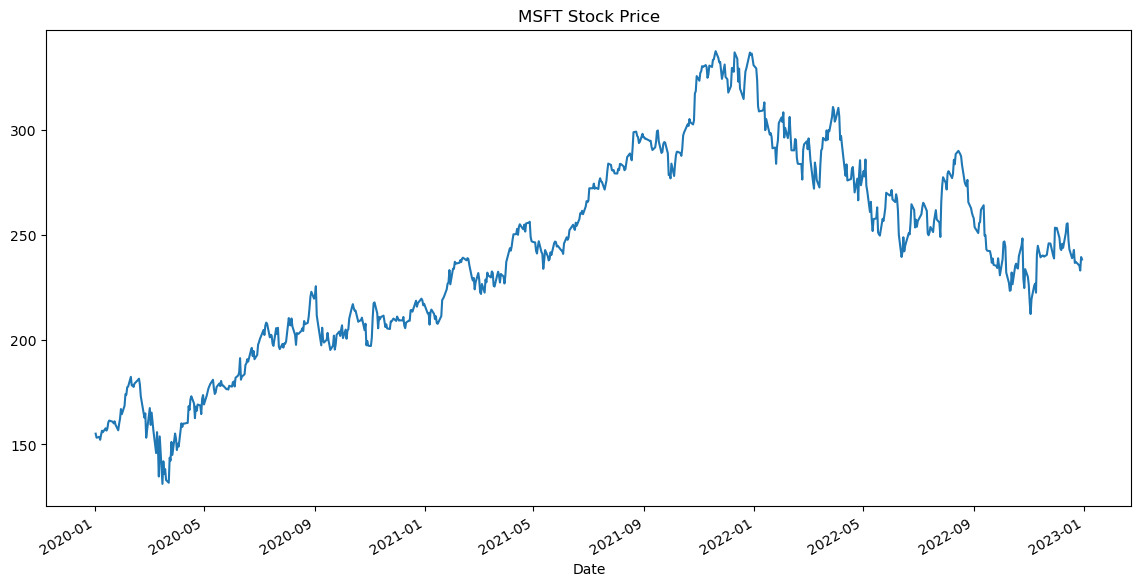

In [3]:
for stock in stocks:
    plt.figure(figsize=(14, 7))
    data['Adj Close'][stock].plot()
    plt.title(stock + ' Stock Price')
    plt.show()

In [4]:
# Compute the returns of each stock
daily_returns = data['Adj Close'].pct_change().dropna()


In [5]:
# Covariance matrix
print("Covariance matrix:")
print(daily_returns.cov())

Covariance matrix:
           AAPL     GOOGL       IBM      MSFT
AAPL   0.000541  0.000370  0.000205  0.000413
GOOGL  0.000370  0.000473  0.000189  0.000395
IBM    0.000205  0.000189  0.000365  0.000201
MSFT   0.000413  0.000395  0.000201  0.000479


In [6]:
# Correlation matrix
print("\nCorrelation matrix:")
print(daily_returns.corr())


Correlation matrix:
           AAPL     GOOGL       IBM      MSFT
AAPL   1.000000  0.730437  0.460928  0.811363
GOOGL  0.730437  1.000000  0.455747  0.830213
IBM    0.460928  0.455747  1.000000  0.479176
MSFT   0.811363  0.830213  0.479176  1.000000


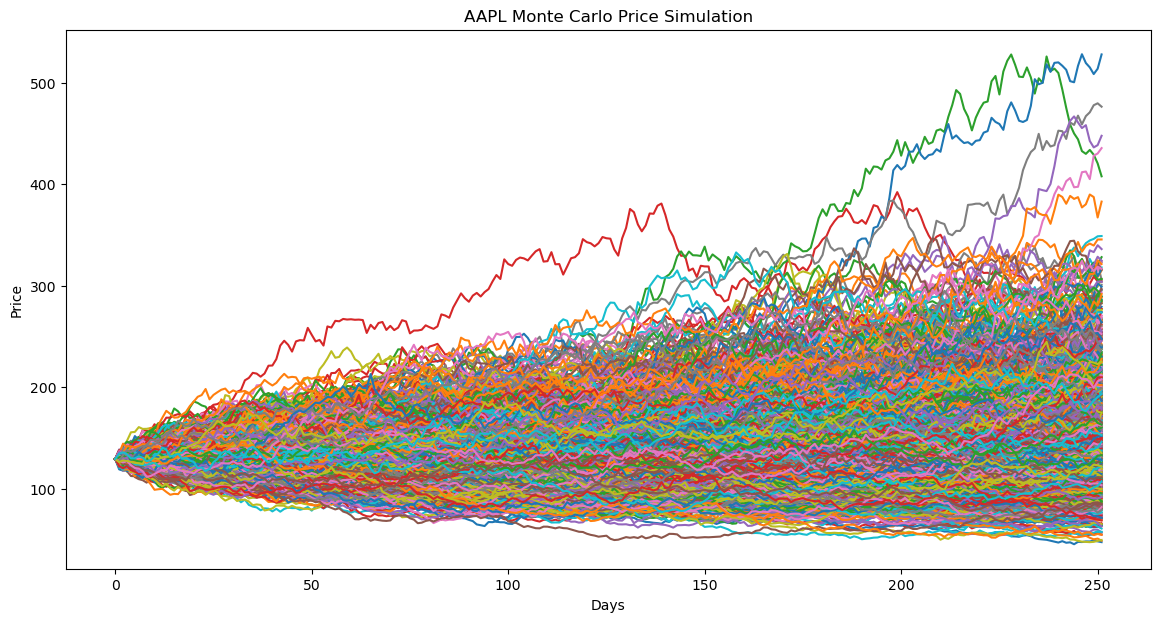

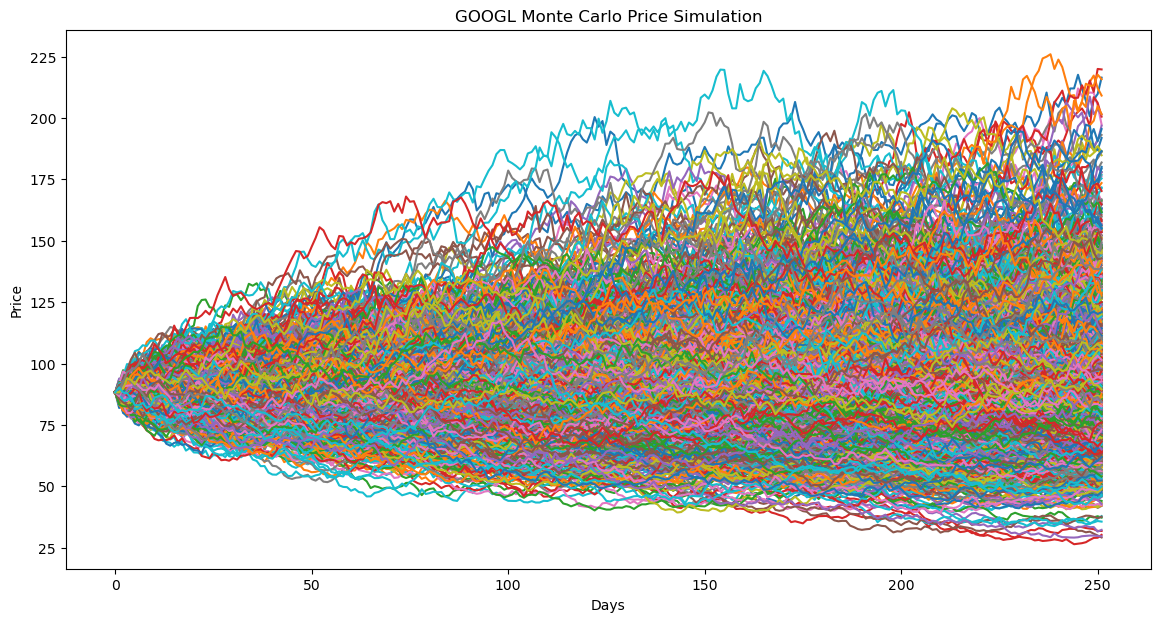

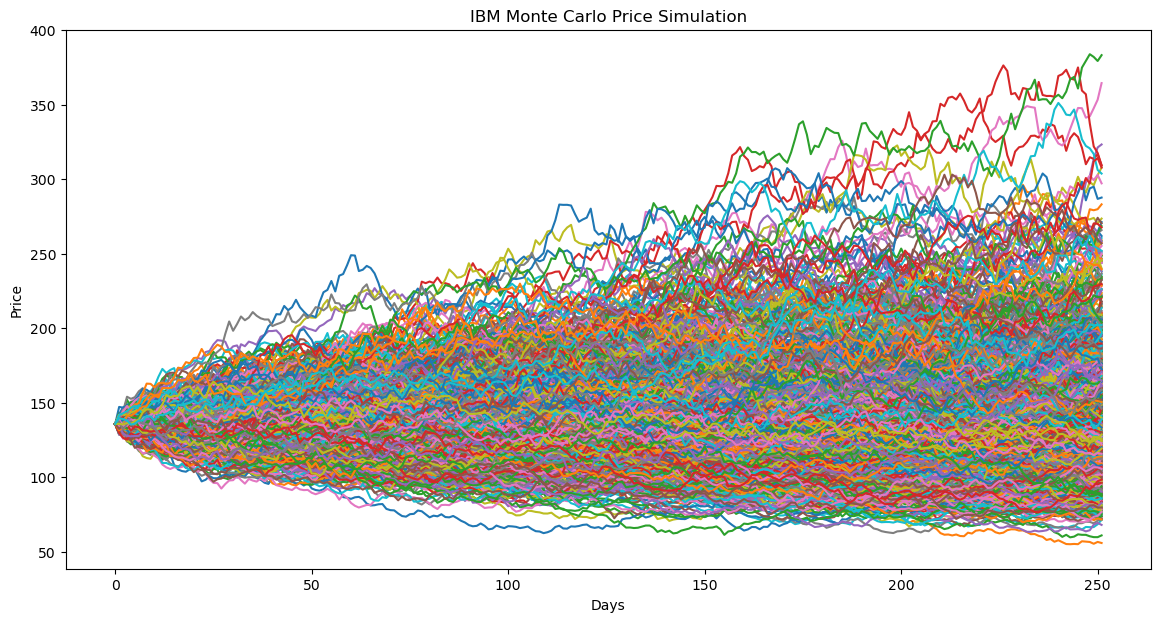

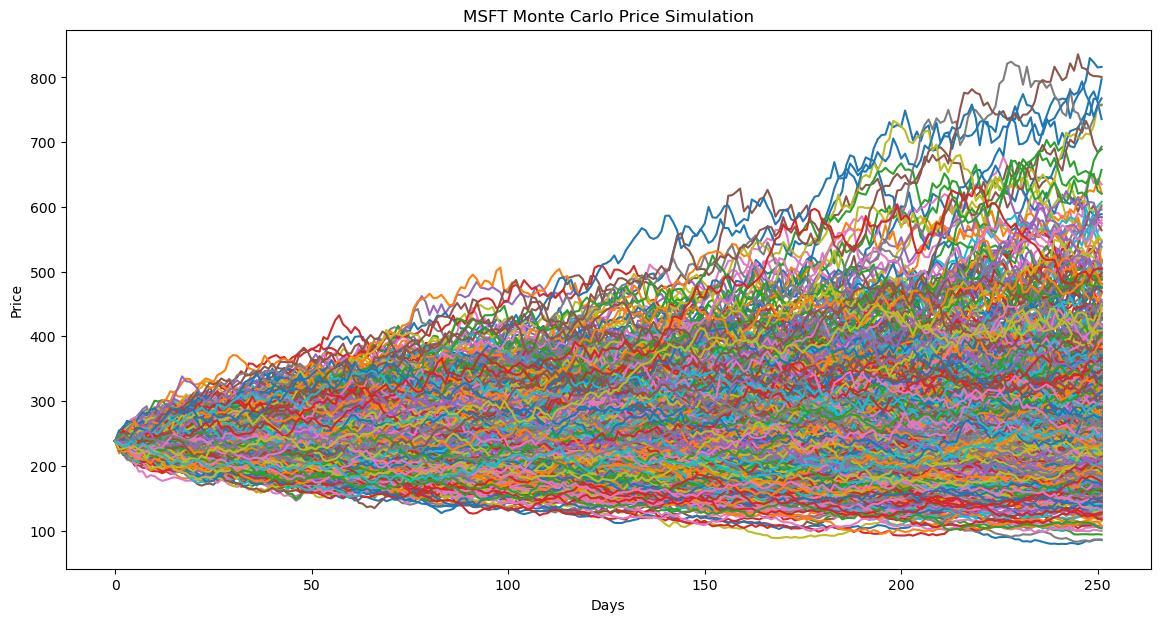

In [7]:
import numpy as np

def monte_carlo_simulation(stock_name, num_simulations=1000, num_days=252):
    log_returns = np.log(1 + daily_returns[stock_name].dropna())
    mean_return = log_returns.mean()
    variance = log_returns.var()
    stdev = log_returns.std()

    price = data['Adj Close'][stock_name].iloc[-1]

    simulated_prices = np.zeros((num_days, num_simulations))
    simulated_prices[0] = price

    for s in range(num_simulations):
        for t in range(1, num_days):
            simulated_prices[t, s] = simulated_prices[t-1, s] * np.exp((mean_return - 0.5*variance) + stdev*np.random.normal(0, 1))

    plt.figure(figsize=(14, 7))
    plt.plot(simulated_prices)
    plt.title(stock_name + ' Monte Carlo Price Simulation')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()

for stock in stocks:
    monte_carlo_simulation(stock)

In [8]:
from scipy.optimize import minimize

def optimize_portfolio(returns):
    n = len(stocks)
    weights_init = [1./n] * n
    bounds = [(0, 1) for i in range(n)]
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    def neg_sharpe(weights):
        port_return = np.sum(returns.mean() * weights) * 252
        port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        return -port_return / port_vol

    result = minimize(neg_sharpe, weights_init, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

optimal_weights = optimize_portfolio(daily_returns)
print("Optimal weights:")
for stock, weight in zip(stocks, optimal_weights):
    print(stock, ":", weight)

Optimal weights:
AAPL : 0.8028724984909581
GOOGL : 4.2934406030425976e-17
IBM : 0.16697264488612615
MSFT : 0.030154856622915657


In [9]:
investment = 100000
allocation = {}

for stock, weight in zip(stocks, optimal_weights):
    allocation[stock] = weight * investment

print("Recommended Allocation:")
for stock, amount in allocation.items():
    print(stock + ":", "${:,.2f}".format(amount))


Recommended Allocation:
AAPL: $80,287.25
GOOGL: $0.00
IBM: $16,697.26
MSFT: $3,015.49


In [10]:
#Predicting the prices
df = data['Adj Close']
df.head()
log_returns = np.log(df/df.shift(1))
log_returns.head()

AAPL     GOOGL       IBM      MSFT
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.009770 -0.005245 -0.008007 -0.012530
2020-01-06  0.007937  0.026305 -0.001788  0.002582
2020-01-07 -0.004714 -0.001933  0.000671 -0.009160
2020-01-08  0.015958  0.007092  0.008312  0.015803

<AxesSubplot:xlabel='Date'>

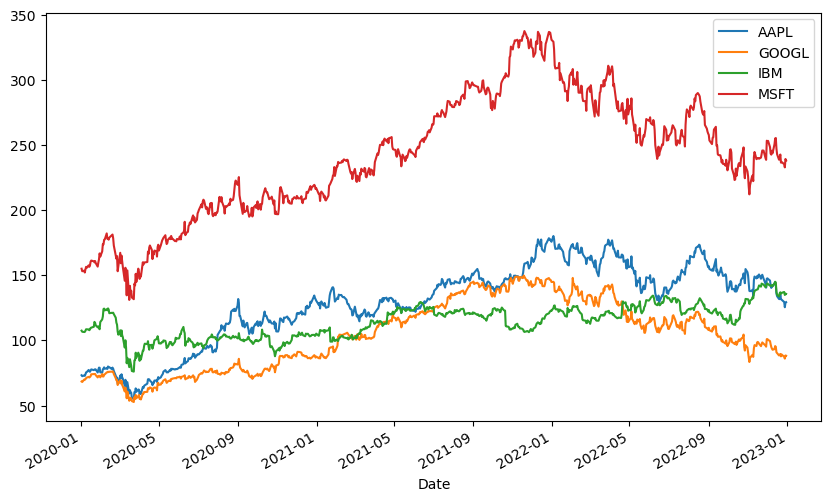

In [11]:
df.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

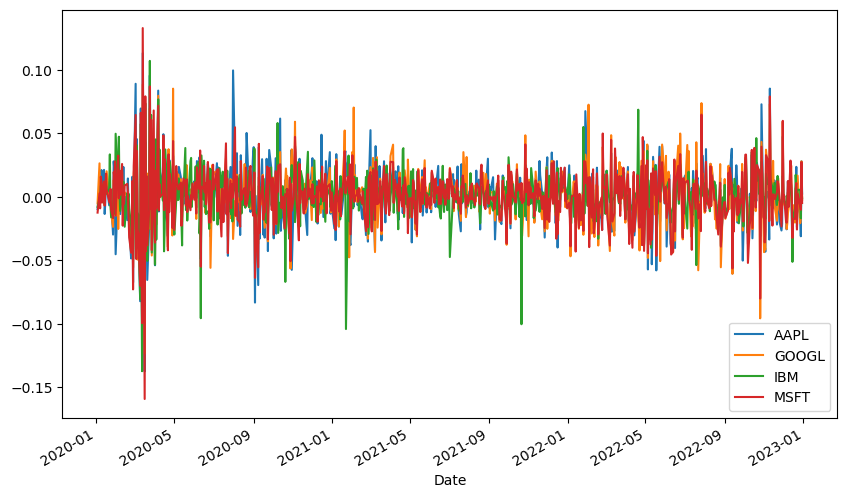

In [12]:
log_returns.plot(figsize=(10,6))

In [13]:
#mean of returns
u = log_returns.mean()
u

AAPL     0.000753
GOOGL    0.000337
IBM      0.000309
MSFT     0.000568
dtype: float64

In [14]:
#variance of returns
var = log_returns.var()
var

AAPL     0.000541
GOOGL    0.000474
IBM      0.000370
MSFT     0.000481
dtype: float64

In [15]:
drift = u - (.5*var)
drift

AAPL     0.000483
GOOGL    0.000100
IBM      0.000124
MSFT     0.000328
dtype: float64

In [16]:
#standard deivation of returns
stdev = log_returns.std()
stdev

AAPL     0.023255
GOOGL    0.021772
IBM      0.019236
MSFT     0.021922
dtype: float64

In [17]:
t_intervals = 250
iterations = 50

x = np.random.rand(t_intervals, iterations)
x

array([[0.41885411, 0.19362521, 0.89485285, ..., 0.95112313, 0.40165813,
        0.48323282],
       [0.79821301, 0.50978021, 0.39964428, ..., 0.77953876, 0.34903287,
        0.90366385],
       [0.84414794, 0.24282212, 0.67238189, ..., 0.50578149, 0.92165521,
        0.26412112],
       ...,
       [0.01492726, 0.48204296, 0.50724787, ..., 0.72659627, 0.23093061,
        0.64124714],
       [0.49941486, 0.15448951, 0.50638217, ..., 0.45269378, 0.27242958,
        0.54211037],
       [0.94220289, 0.91618781, 0.61510291, ..., 0.99350841, 0.87946891,
        0.18468855]])

In [18]:
from scipy.stats import norm
import matplotlib.pyplot as plt
Z = norm.ppf(x)
Z

array([[-2.04825820e-01, -8.64614494e-01,  1.25275659e+00, ...,
         1.65584242e+00, -2.49057566e-01, -4.20414773e-02],
       [ 8.35255299e-01,  2.45178112e-02, -2.54267951e-01, ...,
         7.70636416e-01, -3.87932824e-01,  1.30271436e+00],
       [ 1.01165275e+00, -6.97253372e-01,  4.46499840e-01, ...,
         1.44925425e-02,  1.41629352e+00, -6.30691529e-01],
       ...,
       [-2.17201521e+00, -4.50268240e-02,  1.81687172e-02, ...,
         6.02550940e-01, -7.35785553e-01,  3.61794353e-01],
       [-1.46673645e-03, -1.01736671e+00,  1.59984176e-02, ...,
        -1.18858363e-01, -6.05481442e-01,  1.05751822e-01],
       [ 1.57353831e+00,  1.37987746e+00,  2.92644138e-01, ...,
         2.48423058e+00,  1.17233602e+00, -8.97640761e-01]])

In [19]:
#google daily returns
#The formula calculates the daily returns using the drift (mean return) and the standard deviation (stdev[0]) multiplied by the random values Z generated from a standard normal distribution.
apple_daily_returns = np.exp(drift[0] + stdev[0] * Z)
google_daily_returns = np.exp(drift[1] + stdev[1] * Z)
ibm_daily_returns = np.exp(drift[2] + stdev[2] * Z)
msft_daily_returns = np.exp(drift[3] + stdev[3] * Z)

print(apple_daily_returns)
print(google_daily_returns)
print(ibm_daily_returns)
print(msft_daily_returns)

[[0.99572894 0.98056754 1.03005916 ... 1.03976019 0.99470524 0.99950551]
 [1.02010661 1.00105379 0.99458472 ... 1.01857482 0.99149795 1.03125656]
 [1.02429985 0.98439137 1.01092579 ... 1.00082044 1.03398403 0.9859163 ]
 ...
 [0.95120309 0.99943612 1.000906   ... 1.01460111 0.98350967 1.00893638]
 [1.00044906 0.97709046 1.00085548 ... 0.99772159 0.98649448 1.00294669]
 [1.03777199 1.03310875 1.00731521 ... 1.05998469 1.02813454 0.97981472]]
[[0.99564944 0.98144899 1.02775319 ... 1.0368126  0.99469106 0.9991845 ]
 [1.01845323 1.00063352 0.99457823 ... 1.01702137 0.99168801 1.02887169]
 [1.02237222 0.98503177 1.00986927 ... 1.00041513 1.03141912 0.98646032]
 ...
 [0.95390564 0.99911955 1.00049521 ... 1.01330625 0.98420573 1.00800854]
 [1.00006758 0.97819032 1.00044793 ... 0.99751477 0.98700193 1.00240487]
 [1.03495634 1.03060167 1.00649206 ... 1.05568223 1.02595522 0.98074352]]
[[0.99619107 0.98362758 1.02451765 ... 1.0324924  0.99534383 0.99931536]
 [1.01632262 1.00059564 0.99524407 ... 

In [20]:
drift.values

array([4.83071398e-04, 9.95071369e-05, 1.23834060e-04, 3.28003023e-04])

In [21]:
S0 = df.iloc[-1]
S0

AAPL     129.378006
GOOGL     88.230003
IBM      135.746002
MSFT     238.194717
Name: 2022-12-30 00:00:00, dtype: float64

In [22]:
#store the simulated prices of a financial instrument of stocks over time based on the daily returns calculated
apple_price_list = np.zeros_like(apple_daily_returns)
google_price_list = np.zeros_like(google_daily_returns)
ibm_price_list = np.zeros_like(ibm_daily_returns)
msft_price_list = np.zeros_like(msft_daily_returns)

print(apple_price_list)
print(google_price_list)
print(ibm_price_list)
print(msft_price_list)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
#sets the initial value of apple_price_list to the initial price of the s0
apple_price_list[0] = S0[0]
google_price_list[0] = S0[1]
ibm_price_list[0] = S0[2]
msft_price_list[0] = S0[3]

In [24]:
for t in range(1, t_intervals):
    apple_price_list[t] = apple_price_list[t - 1] * apple_daily_returns[t]

In [25]:
apple_price_list

array([[129.37800598, 129.37800598, 129.37800598, ..., 129.37800598,
        129.37800598, 129.37800598],
       [131.97935895, 129.51434375, 128.67738824, ..., 131.78117879,
        128.2780272 , 133.42191697],
       [135.18643767, 127.49280212, 130.08329049, ..., 131.88929674,
        132.63743113, 131.54284272],
       ...,
       [120.77829931, 107.69563775, 215.6445601 , ..., 126.50143417,
        117.52864044, 183.83726652],
       [120.83253636, 105.22838003, 215.82904063, ..., 126.21321207,
        115.94135497, 184.37897781],
       [125.39662134, 108.71236051, 217.40787532, ..., 133.78407309,
        119.20331191, 180.65723643]])

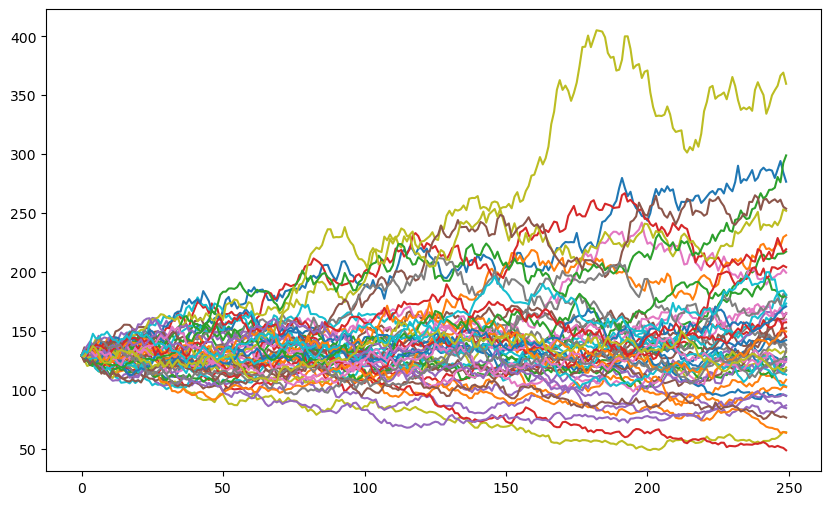

In [26]:
plt.figure(figsize=(10,6))
plt.plot(apple_price_list);

In [27]:
for t in range(1, t_intervals):
    google_price_list[t] = google_price_list[t - 1] * google_daily_returns[t]

google_price_list

array([[ 88.23000336,  88.23000336,  88.23000336, ...,  88.23000336,
         88.23000336,  88.23000336],
       [ 89.85813198,  88.28589881,  87.75164055, ...,  89.73179861,
         87.49663629,  90.77735227],
       [ 91.86845809,  86.96441506,  88.61768538, ...,  89.76904906,
         90.24570392,  89.54825631],
       ...,
       [ 75.82429937,  68.1071061 , 130.4684948 , ...,  79.18317083,
         73.91260274, 112.36208827],
       [ 75.8294232 ,  66.62171184, 130.52693577, ...,  78.98638214,
         72.95188121, 112.63230417],
       [ 78.4801424 ,  68.66044754, 131.37432457, ...,  83.38451974,
         74.8453632 , 110.46340212]])

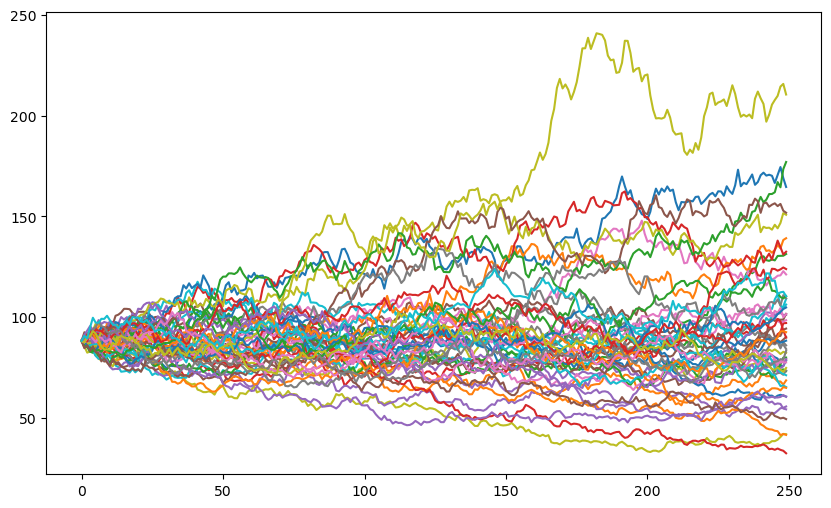

In [28]:
plt.figure(figsize=(10,6))
plt.plot(google_price_list);

In [29]:
for t in range(1, t_intervals):
    ibm_price_list[t] = ibm_price_list[t - 1] * ibm_daily_returns[t]

ibm_price_list

array([[135.7460022 , 135.7460022 , 135.7460022 , ..., 135.7460022 ,
        135.7460022 , 135.7460022 ],
       [137.96173286, 135.82685754, 135.10040379, ..., 137.79035137,
        134.7534821 , 139.20788769],
       [140.69020947, 134.03385367, 136.28263904, ..., 137.84583876,
        138.49230522, 137.54625164],
       ...,
       [119.79494873, 108.95647769, 193.49876807, ..., 124.47153083,
        117.12254872, 169.57086308],
       [119.80640405, 106.85814858, 193.58229635, ..., 124.2026482 ,
        115.78066465, 169.93720582],
       [123.50351576, 109.74609335, 194.69921395, ..., 130.29812431,
        118.43597486, 167.04876404]])

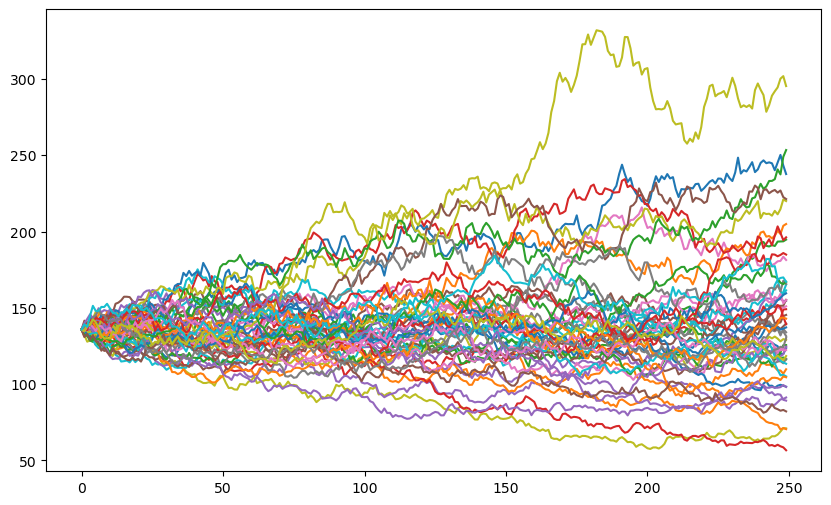

In [30]:
plt.figure(figsize=(10,6))
plt.plot(ibm_price_list);

In [31]:
for t in range(1, t_intervals):
    msft_price_list[t] = msft_price_list[t - 1] * msft_daily_returns[t]

msft_price_list

array([[238.19471741, 238.19471741, 238.19471741, ..., 238.19471741,
        238.19471741, 238.19471741],
       [242.67593786, 238.4009601 , 236.94840475, ..., 242.33241224,
        236.25511388, 245.17558082],
       [248.19939546, 234.86168456, 239.35758289, ..., 242.48893895,
        243.78537492, 241.8884289 ],
       ...,
       [216.32646287, 194.16608408, 373.61677905, ..., 225.97660259,
        210.83540378, 321.43613034],
       [216.39047235, 189.94587592, 373.87044653, ..., 225.46250122,
        208.12365123, 322.28787209],
       [224.05860705, 195.84369559, 376.40010657, ..., 238.15963973,
        213.61180117, 316.11152071]])

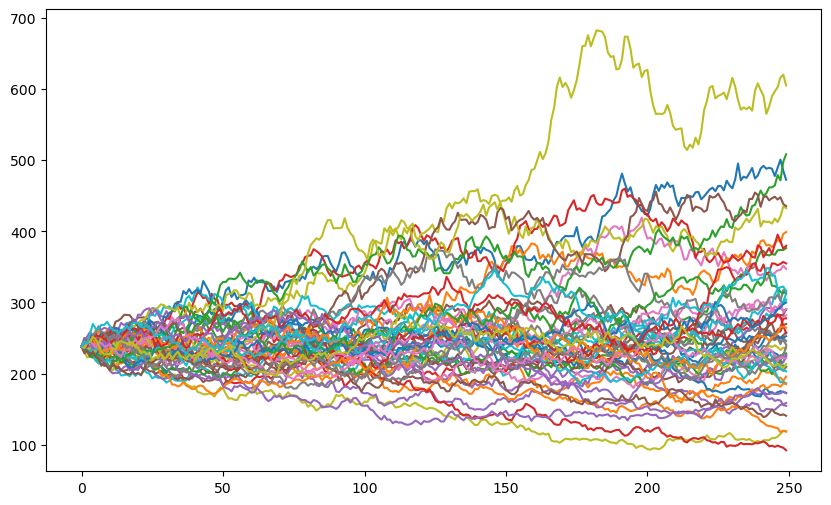

In [32]:
plt.figure(figsize=(10,6))
plt.plot(msft_price_list);

In [33]:
#Calculates the mean (average) of the four stock prices in the predicted list.
print("The average predicted price for Apple is:", round(apple_price_list.mean(),2))

The average predicted price for Apple is: 139.03


In [34]:
print("The average predicted price for Google is:", round(google_price_list.mean(),2))

The average predicted price for Google is: 90.06


In [35]:
print("The average predicted price for IBM is:", round(ibm_price_list.mean(),2))

The average predicted price for IBM is: 138.4


In [36]:
print("The average predicted price for Microsoft is:", round(msft_price_list.mean(),2))

The average predicted price for Microsoft is: 250.31


In [37]:
#Finds the maximum (highest) value among the predicted stock prices
print("The maximum of the predicted stock prices for AAPL:", round(apple_price_list.max(),2))
print("The maximum of the predicted stock prices for GOOG:", round(google_price_list.max(),2))
print("The maximum of the predicted stock prices for IBM:", round(ibm_price_list.max(),2))
print("The maximum of the predicted stock prices for MSFT:",round(msft_price_list.max(),2))

The maximum of the predicted stock prices for AAPL: 405.11
The maximum of the predicted stock prices for GOOG: 240.9
The maximum of the predicted stock prices for IBM: 331.87
The maximum of the predicted stock prices for MSFT: 682.59


In [38]:
#Finds the minimum (lowest) value among the predicted stock prices
print("The minimum of the predicted stock prices for AAPL:", round(apple_price_list.min(),2))
print("The minimum of the predicted stock prices for GOOG:", round(google_price_list.min(),2))
print("The minimum of the predicted stock prices for IBM:", round(ibm_price_list.min(),2))
print("The minimum of the predicted stock prices for MSFT:",round(msft_price_list.min(),2))

The minimum of the predicted stock prices for AAPL: 48.9
The minimum of the predicted stock prices for GOOG: 32.5
The minimum of the predicted stock prices for IBM: 56.67
The minimum of the predicted stock prices for MSFT: 92.21


In [39]:
#Calculates the 5th percentile value of the predicted stock prices. This means 5% of the data falls below this value.
print("Apple:", round(np.percentile(apple_price_list,5),2))
print("Google:", round(np.percentile(google_price_list,5),2))
print("IBM:", round(np.percentile(ibm_price_list,5),2))
print("Microsoft:", round(np.percentile(msft_price_list,5),2))

Apple: 86.49
Google: 57.17
IBM: 93.11
Microsoft: 159.68


In [40]:
#Calculates the 95th percentile value of the predicted stock prices. This means 95% of the data falls below this value.
print("Apple:", round(np.percentile(apple_price_list,95),2))
print("Google:", round(np.percentile(google_price_list,95),2))
print("IBM:", round(np.percentile(ibm_price_list,95),2))
print("Microsoft:", round(np.percentile(msft_price_list,95),2))

Apple: 218.82
Google: 136.08
IBM: 200.26
Microsoft: 382.53
